# It’s Not Your Imagination. Summers Are Getting Hotter - A Replication

We setup our environment to allow multiple outputs for each code cell. Also, we use the magic command to display matplotlib plots in the Jupter notebook.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

For data wrangling, we use the [Pandas](http://pandas.pydata.org) library, one of the most versatile work horses for data analytics. Additionally, we need the [NumPy](http://www.numpy.org) library for general scientific computing.

In [4]:
import pandas as pd
import numpy as np

In [5]:
nh_hist_data = pd.read_csv('nh_histogram.csv')

## Interactive visualization with Altair

[Altair](https://altair-viz.github.io) is a fairly new visualization library for Python, which focuses on a declarative approach to data visualization. 

We can highlight the various decades using a mouseover effect.

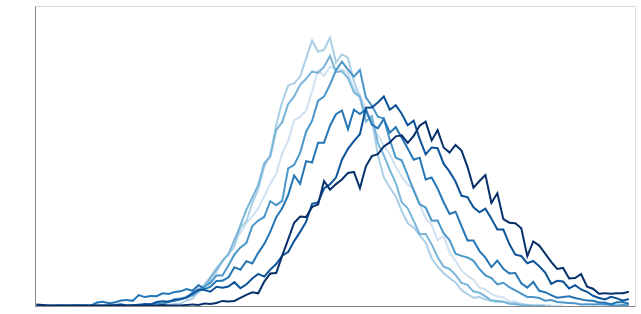

In [7]:
#!pip install altair
import altair as alt

alt.renderers.enable('notebook')

highlight = alt.selection(type='single',on='mouseover', nearest=True,
                        fields=['z_base', 'd'], empty='none')

base = alt.Chart().mark_line().encode(
    x=alt.X('z_base', axis=alt.Axis(title=None, grid=False, ticks=False, labels=False)),
    y=alt.Y('d', axis=alt.Axis(title=None, grid=False, ticks=False, labels=False), scale=alt.Scale(domain=(0, .05))),
    color=alt.Color('decade', legend=None),
    
)

selector = base.mark_point().encode(
    x='z_base',
    y='d',
    opacity=alt.value(0),
).properties(
    selection=highlight,
)

areas = base.mark_area().encode(
    opacity=alt.condition(~highlight, alt.value(0), alt.value(1))
)

text = alt.Chart().mark_text(align='right', dx=500, dy=-100, size=15).encode(
    text=alt.condition(highlight, 'viz_decade', alt.value(' '))
)

alt.layer(base, selector,areas, text,
          data = nh_hist_data, width=600, height=300)
